In [23]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import math 
import matplotlib
import matplotlib.pyplot as plt
ALFAA = pdr.get_data_yahoo('ALFAA.MX',
start="01/01/2017", interval="m")
ALFAA["r"]= (np.log(ALFAA["Adj Close"]) - np.log(ALFAA["Adj Close"].shift(1)))
MXX = pdr.get_data_yahoo('^MXX',
start="01/01/2017", interval="m")
MXX["r"]= (np.log(MXX["Adj Close"]) - np.log(MXX["Adj Close"].shift(1)))
N=45

In [24]:
ALFAA['r'].head()

Date
2017-01-01         NaN
2017-02-01   -0.051955
2017-03-01    0.064441
2017-04-01   -0.056202
2017-05-01    0.039786
Name: r, dtype: float64

In [25]:
ALFAA= ALFAA.dropna()
MXX = MXX.dropna()
y = ALFAA["Adj Close"]
x = MXX["Adj Close"]


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [28]:
X = x[:, np.newaxis]
X.shape
model.fit(X, y)


<ipython-input-28-a5557e104beb>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = x[:, np.newaxis]


LinearRegression()

In [29]:
model.coef_ 

array([0.00033348])

In [30]:
model.intercept_ # This is the bias value


2.392648774162824

In [31]:
xfit = np.linspace(-1, 75000)
xfit

array([-1.00000000e+00,  1.52963265e+03,  3.06026531e+03,  4.59089796e+03,
        6.12153061e+03,  7.65216327e+03,  9.18279592e+03,  1.07134286e+04,
        1.22440612e+04,  1.37746939e+04,  1.53053265e+04,  1.68359592e+04,
        1.83665918e+04,  1.98972245e+04,  2.14278571e+04,  2.29584898e+04,
        2.44891224e+04,  2.60197551e+04,  2.75503878e+04,  2.90810204e+04,
        3.06116531e+04,  3.21422857e+04,  3.36729184e+04,  3.52035510e+04,
        3.67341837e+04,  3.82648163e+04,  3.97954490e+04,  4.13260816e+04,
        4.28567143e+04,  4.43873469e+04,  4.59179796e+04,  4.74486122e+04,
        4.89792449e+04,  5.05098776e+04,  5.20405102e+04,  5.35711429e+04,
        5.51017755e+04,  5.66324082e+04,  5.81630408e+04,  5.96936735e+04,
        6.12243061e+04,  6.27549388e+04,  6.42855714e+04,  6.58162041e+04,
        6.73468367e+04,  6.88774694e+04,  7.04081020e+04,  7.19387347e+04,
        7.34693673e+04,  7.50000000e+04])

In [32]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
yfit

array([ 2.39231529,  2.90275279,  3.41319028,  3.92362777,  4.43406527,
        4.94450276,  5.45494025,  5.96537774,  6.47581524,  6.98625273,
        7.49669022,  8.00712772,  8.51756521,  9.0280027 ,  9.5384402 ,
       10.04887769, 10.55931518, 11.06975268, 11.58019017, 12.09062766,
       12.60106516, 13.11150265, 13.62194014, 14.13237763, 14.64281513,
       15.15325262, 15.66369011, 16.17412761, 16.6845651 , 17.19500259,
       17.70544009, 18.21587758, 18.72631507, 19.23675257, 19.74719006,
       20.25762755, 20.76806505, 21.27850254, 21.78894003, 22.29937752,
       22.80981502, 23.32025251, 23.83069   , 24.3411275 , 24.85156499,
       25.36200248, 25.87243998, 26.38287747, 26.89331496, 27.40375246])

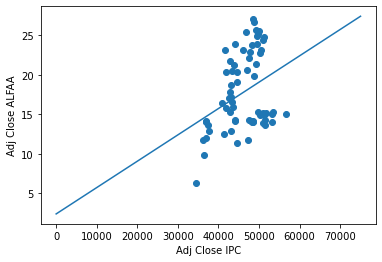

In [33]:
plt.scatter(x, y)
plt.xlabel("Adj Close IPC")
plt.ylabel("Adj Close ALFAA")
plt.plot(xfit, yfit);
plt.show()

In [34]:
# Y = 0.00010456X + 9.94

In [35]:
import sklearn.metrics
y = np.array(y)


sklearn.metrics.mean_squared_error(y[:50], yfit)

# WE CAN SEE A POSIRIVE REALTION, THUS NOT A STRONG RELATIONSHIP AS WE HAVE
# A BIG ERROR

164.7211166024989

In [38]:
!pip install researchpy

In [40]:
import researchpy as rp
ALFAA_r = np.log(ALFAA['Adj Close']) - np.log(ALFAA['Adj Close'].shift(1))
MXX_r = np.log(MXX['Adj Close']) - np.log(MXX['Adj Close'].shift(1))

rp.ttest(ALFAA_r,MXX_r,equal_variances=False)

(    Variable      N      Mean        SD        SE  95% Conf.  Interval
 0  Adj Close   67.0 -0.008823  0.126256  0.015425  -0.039619  0.021973
 1  Adj Close   67.0  0.000503  0.048744  0.005955  -0.011387  0.012393
 2   combined  134.0 -0.004160  0.095454  0.008246  -0.020470  0.012150,
                           Welch's t-test  results
 0  Difference (Adj Close - Adj Close) =   -0.0093
 1                  Degrees of freedom =   85.8306
 2                                   t =   -0.5640
 3               Two side test p value =    0.5742
 4              Difference < 0 p value =    0.2871
 5              Difference > 0 p value =    0.7129
 6                           Cohen's d =   -0.0975
 7                           Hedge's g =   -0.0969
 8                       Glass's delta =   -0.0739
 9                         Pearson's r =    0.0608)

In [41]:
# WE OBSERVE LOW CONFIDENCE INTERVALS, THAT INDICATES US THAT WE SHOULD TRUST
#SO MUCH IN THE MODEL.

In [ ]:
wq